# Importing Libraries

In [2]:
import os
import glob
import numpy as np

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img,array_to_img
import matplotlib.pyplot as plt

from keras.models import *
from keras.layers.merge import concatenate
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D, BatchNormalization
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import array_to_img


In [5]:
%cd /content/drive/My Drive/EM Dataset/data


/content/drive/My Drive/EM Dataset/data


# Data preprocessing

In [20]:
#Creating directories to store augmented images and respective masks
if not os.path.lexists("./augRes"+"/img"):
        os.mkdir("./augRes"+"/img") 
if not os.path.lexists("./augRes"+"/lab"):
        os.mkdir("./augRes"+"/lab")

In [21]:
#Defining paths for train and test images.
train_images = glob.glob("./train/*tif")
label_images = glob.glob("./label/*tif")
testimg = glob.glob("./label/*tiff")

In [22]:
print(train_images)

['./train/0.tif', './train/1.tif', './train/10.tif', './train/11.tif', './train/12.tif', './train/13.tif', './train/14.tif', './train/15.tif', './train/16.tif', './train/17.tif', './train/18.tif', './train/19.tif', './train/2.tif', './train/20.tif', './train/21.tif', './train/22.tif', './train/23.tif', './train/24.tif', './train/25.tif', './train/26.tif', './train/27.tif', './train/28.tif', './train/29.tif', './train/3.tif', './train/4.tif', './train/5.tif', './train/6.tif', './train/7.tif', './train/8.tif', './train/9.tif']


# Visualizing examples

./train/0.tif


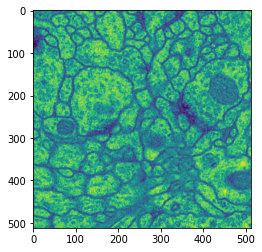

./train/1.tif


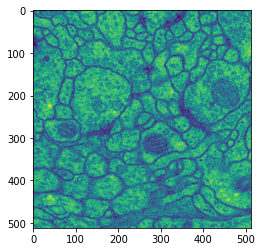

./train/10.tif


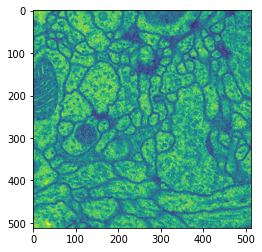

In [23]:
for i in range(3):
  imgname = train_images[i]
  print(imgname)
  image = load_img(imgname, color_mode= "grayscale")
  arr = img_to_array(image)
  plt.imshow(np.squeeze(arr,axis = 2))
  plt.show()

# Performing Image Augmentation
Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize.

In [ ]:
def augmentation(path_aug='./imgaug'):
    train_path="./train"
    label_path="./label"
    img_type="tif"
    train_imgs = glob.glob(train_path+"/*."+img_type)
    label_imgs = glob.glob(label_path+"/*."+img_type)
    slices = len(train_imgs)
    
    #Creating an instance of ImageDataGenerator to perform Image Augmentation
    datagen = ImageDataGenerator(rotation_range=10,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,vertical_flip=True,fill_mode='constant',cval=0)
    print('Using real-time data augmentation.')
    for i in range(slices):
        #Loading images
        img_t = load_img(train_path+"/"+str(i)+".tif",color_mode = "grayscale")
        img_l = load_img(label_path+"/"+str(i)+".tif",color_mode = "grayscale")
        x_t = img_to_array(img_t)
        x_l = img_to_array(img_l)
        s=np.shape(x_t)
        img = np.ndarray(shape=(s[0],s[1],3),dtype=np.uint8)
        #Combining images and masks for augmentation
        img[:,:,0]=x_t[:,:,0]
        img[:,:,2]=x_l[:,:,0]
        img = img.reshape((1,) + img.shape)
        batches = 0
        #Performing augmentation as per the batch size
        for batch in datagen.flow(img, batch_size=1,save_to_dir=path_aug,save_prefix=str(i),save_format='tif'):
            batches += 1
            if batches >= 30:
                break
                
    aug_imgs = glob.glob(path_aug+"/*.tif")
    savedir = path_aug + "/train"
    
augmentation()

Using real-time data augmentation.


In [ ]:
aug_imgs = glob.glob("imgaug"+"/*.tif")
print(aug_imgs)
i = 0;

i = 0;
#Loading the augmented images and saving them
for img in aug_imgs:
        img =load_img(str(img))
        img=img_to_array(img)
        img_train = img[:,:,:1]
        img_label = img[:,:,2:]
        img_train = array_to_img(img_train)
        img_label = array_to_img(img_label)
        #Saving the augmented images and respective labels separately
        img_train.save("augRes"+"/img/"+str(i)+".tif")
        img_label.save("augRes"+"/lab/"+str(i)+".tif")
        i+=1


['imgaug/14_0_9269.tif', 'imgaug/14_0_5066.tif', 'imgaug/14_0_243.tif', 'imgaug/14_0_3123.tif', 'imgaug/14_0_6709.tif', 'imgaug/14_0_2252.tif', 'imgaug/14_0_7524.tif', 'imgaug/14_0_8922.tif', 'imgaug/14_0_7136.tif', 'imgaug/14_0_3696.tif', 'imgaug/14_0_1355.tif', 'imgaug/15_0_4831.tif', 'imgaug/15_0_5664.tif', 'imgaug/15_0_382.tif', 'imgaug/15_0_8128.tif', 'imgaug/15_0_5145.tif', 'imgaug/15_0_6325.tif', 'imgaug/15_0_7746.tif', 'imgaug/15_0_6579.tif', 'imgaug/15_0_1024.tif', 'imgaug/15_0_4880.tif', 'imgaug/15_0_6846.tif', 'imgaug/15_0_3051.tif', 'imgaug/15_0_2180.tif', 'imgaug/15_0_3142.tif', 'imgaug/15_0_8134.tif', 'imgaug/15_0_755.tif', 'imgaug/15_0_5810.tif', 'imgaug/15_0_5501.tif', 'imgaug/15_0_263.tif', 'imgaug/15_0_9044.tif', 'imgaug/15_0_7085.tif', 'imgaug/15_0_8251.tif', 'imgaug/15_0_3630.tif', 'imgaug/15_0_9390.tif', 'imgaug/15_0_3075.tif', 'imgaug/15_0_746.tif', 'imgaug/15_0_5792.tif', 'imgaug/15_0_8351.tif', 'imgaug/15_0_2482.tif', 'imgaug/15_0_4073.tif', 'imgaug/16_0_5751.ti

In [ ]:
aug_imgs = glob.glob("imgaug"+"/*.tif")
imgdatas = np.ndarray((len(train_images)+len(aug_imgs),512,512,1), dtype=np.uint8)
imglabels = np.ndarray((len(label_images)+len(aug_imgs),512,512,1), dtype=np.uint8)
t_aug = glob.glob("./augRes/img/*tif")
t_labels = glob.glob("./augRes/lab/*tif")
print(t_aug)

#Loading the dataset by reshaping the images and labels
i = 0;
for img in train_images:
  imgname = train_images[i]
  arr = imread(str(imgname))
  arr = np.array([arr])
  imgdatas[i] =arr.T

  labelname = label_images[i]
  arr1 = imread(str(labelname))
  arr1 = np.array([arr1])
  imglabels[i] =arr1.T
  i+=1;

#Concatenating the augmented images and labels with train images and labels
for image_a in t_aug:
  imgname = t_aug[f]
  arr = imread(str(imgname))
  arr = np.array([arr])
  imgdatas[i] =arr.T

  labelname = t_labels[f]
  arr1 = imread(str(labelname))
  arr1 = np.array([arr1])
  imglabels[i] =arr1.T
  f+=1
  i+=1;




['./augRes/img/437.tif', './augRes/img/438.tif', './augRes/img/439.tif', './augRes/img/440.tif', './augRes/img/441.tif', './augRes/img/442.tif', './augRes/img/443.tif', './augRes/img/444.tif', './augRes/img/445.tif', './augRes/img/446.tif', './augRes/img/447.tif', './augRes/img/448.tif', './augRes/img/449.tif', './augRes/img/450.tif', './augRes/img/451.tif', './augRes/img/452.tif', './augRes/img/453.tif', './augRes/img/454.tif', './augRes/img/455.tif', './augRes/img/456.tif', './augRes/img/457.tif', './augRes/img/458.tif', './augRes/img/459.tif', './augRes/img/460.tif', './augRes/img/461.tif', './augRes/img/462.tif', './augRes/img/463.tif', './augRes/img/464.tif', './augRes/img/465.tif', './augRes/img/466.tif', './augRes/img/467.tif', './augRes/img/468.tif', './augRes/img/469.tif', './augRes/img/470.tif', './augRes/img/471.tif', './augRes/img/472.tif', './augRes/img/473.tif', './augRes/img/474.tif', './augRes/img/475.tif', './augRes/img/476.tif', './augRes/img/477.tif', './augRes/img/4

In [ ]:
#Preprocessing and scaling the data
def create_data():
  train_data = imgdatas/255
  train_mask = imglabels/255

  train_data = train_data.astype('float32')
  train_mask = train_mask.astype('float32')

  train_mask[train_mask>0.5] = 1
  train_mask[train_mask <= 0.5] = 0

  #Saving the preprocessed data an .npy arrays
  np.save("mytrain.npy",train_data[0:800])
  np.save("mylab.npy",train_mask[0:800])

  np.save("tests.npy",train_data[800:])
  np.save("testl.npy",train_mask[800:])

create_data()

# Defining the model- UNET

In [26]:
def unet():
 inputs = Input((512,512,1))
 conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
 conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
 pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
 conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
 conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
 pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
 conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
 conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
 pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
 conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
 conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
 drop4 = Dropout(0.5)(conv4)
 pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

 conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
 conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
 drop5 = Dropout(0.5)(conv5)

 up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
 merge6 = concatenate([drop4,up6], axis = 3)
 conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
 conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

 up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
 merge7 = concatenate([conv3,up7], axis = 3)
 conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
 conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

 up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
 merge8 = concatenate([conv2,up8], axis = 3)
 conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
 conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

 up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
 merge9 = concatenate([conv1,up9], axis = 3)
 conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
 conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
 conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
 conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

 model = Model(inputs = inputs, outputs = conv10)
 return model

 
model = unet()
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_192 (Conv2D)             (None, 512, 512, 64) 640         input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_193 (Conv2D)             (None, 512, 512, 64) 36928       conv2d_192[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_32 (MaxPooling2D) (None, 256, 256, 64) 0           conv2d_193[0][0]                 
______________________________________________________________________________________

In [27]:
def load_data():
  l = np.load("mytrain.npy")
  t = np.load("mylab.npy")
  return l,t
l,t = load_data()
print(l.shape)

(800, 512, 512, 1)


In [28]:
model_checkpoint = ModelCheckpoint('unet.hdf5', monitor='loss',verbose=1, save_best_only=True)
print('Fitting model...')
history = model.fit(l,t, batch_size=4, epochs=7, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

Fitting model...
Epoch 1/7
160/160 [==============================] - ETA: 0s - loss: 0.3234 - accuracy: 0.8449WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0061s vs `on_test_batch_end` time: 0.3580s). Check your callbacks.

Epoch 00001: loss improved from inf to 0.32344, saving model to unet.hdf5
160/160 [==============================] - 199s 1s/step - loss: 0.3234 - accuracy: 0.8449 - val_loss: 0.2784 - val_accuracy: 0.8846
Epoch 2/7
160/160 [==============================] - ETA: 0s - loss: 0.2231 - accuracy: 0.9027
Epoch 00002: loss improved from 0.32344 to 0.22312, saving model to unet.hdf5
160/160 [==============================] - 198s 1s/step - loss: 0.2231 - accuracy: 0.9027 - val_loss: 0.1959 - val_accuracy: 0.9156
Epoch 3/7
160/160 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.9148
Epoch 00003: loss improved from 0.22312 to 0.19593, saving model to unet.hdf5
160/160 [======================

In [29]:
def get_test_data():
  test_x = np.load("tests.npy")
  test_y = np.load("testl.npy")
  return test_x, test_y
x , y =get_test_data()

{'loss': [0.3234405517578125, 0.223120778799057, 0.19592635333538055, 0.18300192058086395, 0.1745663732290268, 0.16709889471530914, 0.1628924459218979], 'accuracy': [0.8448923826217651, 0.9027121663093567, 0.9147511720657349, 0.9198026657104492, 0.9233436584472656, 0.9264415502548218, 0.9282189607620239], 'val_loss': [0.27838772535324097, 0.1958659589290619, 0.2100868672132492, 0.18895742297172546, 0.17655037343502045, 0.18205934762954712, 0.18917015194892883], 'val_accuracy': [0.88459312915802, 0.9156138300895691, 0.9131559133529663, 0.9199255108833313, 0.9244738817214966, 0.9257882237434387, 0.921369194984436]}


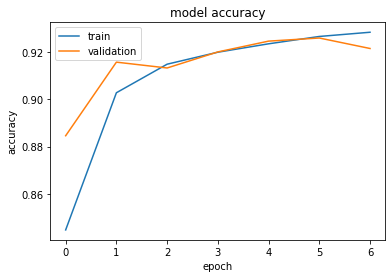

In [30]:
print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()



In [ ]:
model.save("myModel.hdf5")

In [31]:
_ , test_acc = model.evaluate(x,y, batch_size=6)
print(test_acc)


171/171 [==============================] - 98s 575ms/step - loss: 0.1836 - accuracy: 0.9224
0.9223938584327698


In [ ]:
from keras.models import load_model

model = load_model("myModel.hdf5")

In [32]:
%cd /content/drive/My Drive/EM Dataset/results
preds = np.load("imgs_test.npy")

prediction = model.predict(preds, batch_size= 4,verbose=1)



/content/drive/My Drive/EM Dataset/results
8/8 [==============================] - 5s 679ms/step


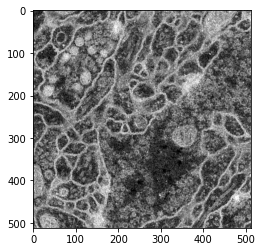

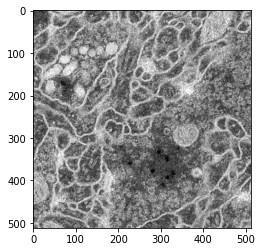

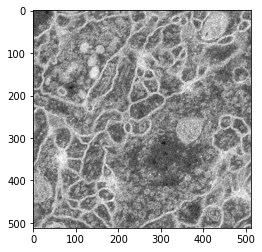

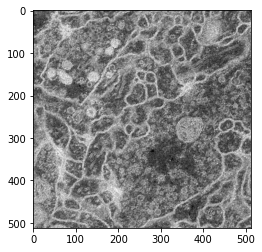

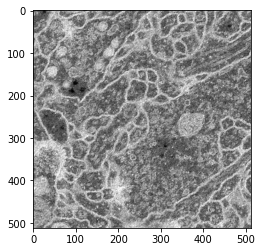

In [33]:
for i in range(5):
  plt.imshow(np.squeeze(preds[i], axis =2),cmap = plt.cm.binary)
  plt.show()

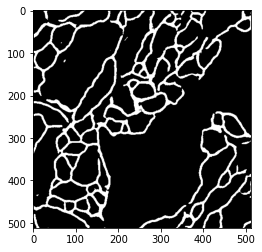

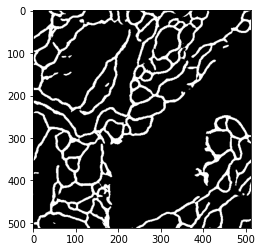

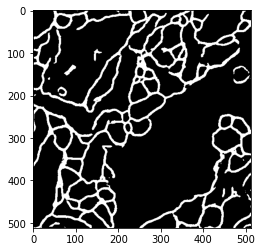

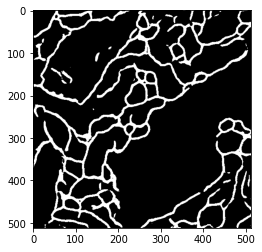

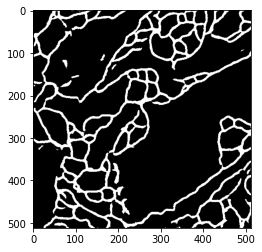

In [34]:
for i in range(5):
  plt.imshow(np.squeeze(prediction[i], axis =2), cmap = plt.cm.binary)
  plt.show()